In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import rand, randn, choice, permutation
from scipy.linalg import hadamard

import torch
from time import time

import tensorly as tl
from tensorly import decomposition
from tensorly.decomposition import parafac
from scipy import linalg
import scipy.io

In [2]:
mat = scipy.io.loadmat('candle_data.mat')

In [3]:
%run KZTIHT_Functions.ipynb
%run "Adaptive Row Removal Functions.ipynb"
colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

In [4]:
data = mat['candle_data'][24:64,13:53,::2]
data_tensor = torch.tensor(data)

In [5]:
data_tensor.shape

torch.Size([40, 40, 10])

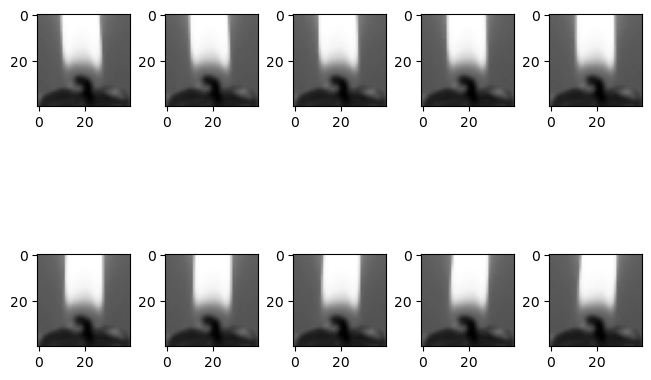

In [6]:
f, axarr = plt.subplots(2,5,constrained_layout=True)
for i in range(5):
    axarr[0,i].imshow(data_tensor[:,:,i], cmap='gray')
for i in range(5):
    axarr[1,i].imshow(data_tensor[:,:,i+5], cmap='gray')

In [7]:
#Low-Rank HOSVD Fitting

r_1 = range(1,10)
r_2 = range(1,10)
r_3 = range(1,10)

for k_1 in r_1:
    for k_2 in r_2:
        for k_3 in r_3:
            approx = HOSVD_rank_app(data_tensor,[k_1,k_2,k_3])
            approx_err = np.linalg.norm(vectorize_tl(approx-data_tensor))/np.linalg.norm(vectorize_tl(data_tensor))
            print("Error for rank (", k_1, ",", k_2, ",",k_3,") is:",approx_err)


Error for rank ( 1 , 1 , 1 ) is: 0.16676541210699333
Error for rank ( 1 , 1 , 2 ) is: 0.16676541210699333
Error for rank ( 1 , 1 , 3 ) is: 0.16676541210699333
Error for rank ( 1 , 1 , 4 ) is: 0.16676541210699333
Error for rank ( 1 , 1 , 5 ) is: 0.16676541210699333
Error for rank ( 1 , 1 , 6 ) is: 0.16676541210699333
Error for rank ( 1 , 1 , 7 ) is: 0.16676541210699333
Error for rank ( 1 , 1 , 8 ) is: 0.16676541210699333
Error for rank ( 1 , 1 , 9 ) is: 0.16676541210699333
Error for rank ( 1 , 2 , 1 ) is: 0.16676541210699333
Error for rank ( 1 , 2 , 2 ) is: 0.15922481222520077
Error for rank ( 1 , 2 , 3 ) is: 0.1592248122217294
Error for rank ( 1 , 2 , 4 ) is: 0.1592248122217279
Error for rank ( 1 , 2 , 5 ) is: 0.1592248122217261
Error for rank ( 1 , 2 , 6 ) is: 0.15922481222172555
Error for rank ( 1 , 2 , 7 ) is: 0.1592248122217253
Error for rank ( 1 , 2 , 8 ) is: 0.15922481222172521
Error for rank ( 1 , 2 , 9 ) is: 0.15922481222172513
Error for rank ( 1 , 3 , 1 ) is: 0.166765412106993

Error for rank ( 4 , 7 , 4 ) is: 0.024771022921866136
Error for rank ( 4 , 7 , 5 ) is: 0.02474565689033587
Error for rank ( 4 , 8 , 1 ) is: 0.06137145299496442
Error for rank ( 4 , 8 , 2 ) is: 0.03003680341762011
Error for rank ( 4 , 8 , 3 ) is: 0.025834157293004707
Error for rank ( 4 , 8 , 4 ) is: 0.024691103030414233
Error for rank ( 4 , 8 , 5 ) is: 0.02464144898186367
Error for rank ( 4 , 9 , 1 ) is: 0.061371452963773214
Error for rank ( 4 , 9 , 2 ) is: 0.03003680312107288
Error for rank ( 4 , 9 , 3 ) is: 0.025821409683033692
Error for rank ( 4 , 9 , 4 ) is: 0.02467496820289857
Error for rank ( 4 , 9 , 5 ) is: 0.024578058775052022
Error for rank ( 5 , 1 , 1 ) is: 0.14703083711342754
Error for rank ( 5 , 1 , 2 ) is: 0.14700665310079872
Error for rank ( 5 , 1 , 3 ) is: 0.1470052122084438
Error for rank ( 5 , 1 , 4 ) is: 0.14700410697864108
Error for rank ( 5 , 1 , 5 ) is: 0.14700382475756224
Error for rank ( 5 , 2 , 1 ) is: 0.07207494962728836
Error for rank ( 5 , 2 , 2 ) is: 0.071815

Error for rank ( 9 , 5 , 2 ) is: 0.026798589353961785
Error for rank ( 9 , 5 , 3 ) is: 0.025482809310859778
Error for rank ( 9 , 5 , 4 ) is: 0.025423133758503743
Error for rank ( 9 , 5 , 5 ) is: 0.025401808706123404
Error for rank ( 9 , 6 , 1 ) is: 0.05915396545191423
Error for rank ( 9 , 6 , 2 ) is: 0.023841721154164754
Error for rank ( 9 , 6 , 3 ) is: 0.01969513763781198
Error for rank ( 9 , 6 , 4 ) is: 0.01960932764377826
Error for rank ( 9 , 6 , 5 ) is: 0.01954182139906703
Error for rank ( 9 , 7 , 1 ) is: 0.058913576287624225
Error for rank ( 9 , 7 , 2 ) is: 0.021650434804101087
Error for rank ( 9 , 7 , 3 ) is: 0.01656573909148286
Error for rank ( 9 , 7 , 4 ) is: 0.01636223790911283
Error for rank ( 9 , 7 , 5 ) is: 0.016274362829671412
Error for rank ( 9 , 8 , 1 ) is: 0.05881022689407057
Error for rank ( 9 , 8 , 2 ) is: 0.0209853230460565
Error for rank ( 9 , 8 , 3 ) is: 0.013214120085204818
Error for rank ( 9 , 8 , 4 ) is: 0.012920116643424993
Error for rank ( 9 , 8 , 5 ) is: 0.01

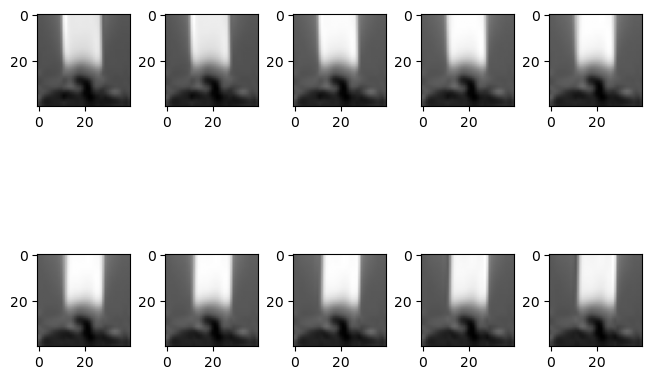

In [8]:
approx = HOSVD_rank_app(data_tensor,[6,7,2])
fig, axarr = plt.subplots(2,5,constrained_layout=True)
for i in range(5):
    axarr[0,i].imshow(approx.numpy()[:,:,i], cmap='gray')
for i in range(5):
    axarr[1,i].imshow(approx.numpy()[:,:,i+5], cmap='gray')

In [9]:
####################################################
## Compresssion using Gaussian Measurements ########
####################################################

np.random.seed(9)

X = data_tensor.numpy()
x = vectorize_np(X)
r = [6,7,2]
itr = 100
n_dim = np.shape(X)
n = n_dim[0]*n_dim[1]*n_dim[2]

m = int(n*25/100)
A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
A = A_4.T
b = A@x 

AA = np.random.normal(0.0,1.0,(m,n))
b_1 = AA@x 

start = time()
y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = 1, itr = itr)
time_kz_fs = time() - start
start = time()
y_ATIHT, error_ATIHT = adaptive_TIHT(A,b,X,r,lamda = 1/m,mu = 1,itr=itr, numb_high = 650)
time_trim_fs = time() - start
y_IHT, error_IHT = TIHT_HOSVD(A,b,X,r,lamda=1/m,itr = itr)

start = time()
y_KZIHT_1, error_KZIHT_1 = KZIHT_HOSVD_RR(AA,b_1,X,n,r,gamma = 1, itr = itr)
time_kz_gauss = time() - start
start = time()
y_ATIHT_1, error_ATIHT_1 = adaptive_TIHT(AA,b_1,X,r,lamda = 1/m,mu = 1,itr=itr, numb_high = 500)
time_trim_gauss = time() - start
y_IHT_1, error_IHT_1 = TIHT_HOSVD(AA,b,X,r,lamda=1/m,itr = itr)

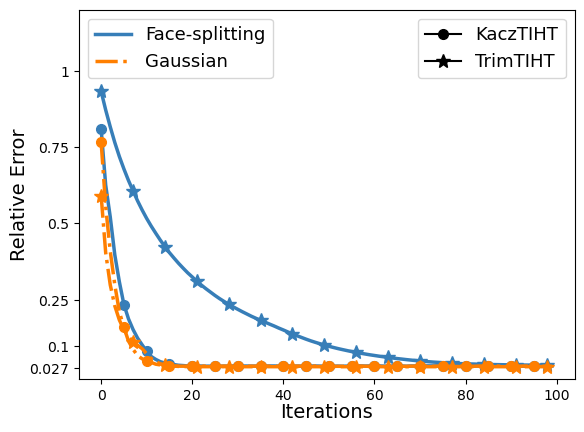

In [10]:
#######################################################
################### Convergence Plots #################
from matplotlib.lines import Line2D
itr = 100
plt.plot(range(itr), error_KZIHT[:itr], label = "KaczTIHT",marker='o',  markevery=5, color = colors[0],linewidth = 2.5, markersize = 7)
plt.plot(range(itr), error_ATIHT[:itr], label = "TrimTIHT",marker='*',markevery=7,color = colors[0],linewidth = 2.5, markersize = 10)
plt.plot(range(itr), error_KZIHT_1[:itr], label = "KaczTIHT",marker='o', markevery=5,  linestyle = "-.",color = colors[1],linewidth = 2.5, markersize = 7)
plt.plot(range(itr), error_ATIHT_1[:itr], label = "TrimTIHT",marker='*',markevery=7,linestyle = "-.",color = colors[1],linewidth = 2.5, markersize = 10)
y_point = np.linalg.norm(vectorize_tl(approx-data_tensor))/np.linalg.norm(vectorize_tl(data_tensor))
custom_lines = [Line2D([0], [0], color=colors[0],linewidth = 2.5),
                Line2D([0], [0], color=colors[1],linestyle="-.",linewidth=2.5)]
legend_1 = plt.legend(custom_lines, ['Face-splitting','Gaussian'], fontsize=13, loc = 'upper left')

custom_lines_2 = [Line2D([0], [0], color='black',marker = 'o',markersize=7),Line2D([0], [0], color='black',marker = '*', markersize = 10)]
plt.gca().add_artist(legend_1)
plt.legend(custom_lines_2, ['KaczTIHT','TrimTIHT'], loc = 'upper right',fontsize = 13)

plt.yticks([ 1, 0.5, 0.75, 0.25, 0.1, 0.027],[ 1, 0.5, 0.75, 0.25, 0.1, 0.027])
plt.ylim(-0.01,1.2)
plt.xlabel(xlabel=r'Iterations',labelpad = 0, fontsize = 14)
plt.ylabel(ylabel=r'Relative Error',labelpad = 0, fontsize = 14)
plt.savefig('Recovery_Candle.png', dpi=300,  bbox_inches="tight")


In [11]:
KZIHT_rec = np.reshape(y_KZIHT,(40,40,10))
ATIHT_rec = np.reshape(y_ATIHT,(40,40,10))
KZIHT_rec_1 = np.reshape(y_KZIHT_1,(40,40,10))
ATIHT_rec_1 = np.reshape(y_ATIHT_1,(40,40,10))

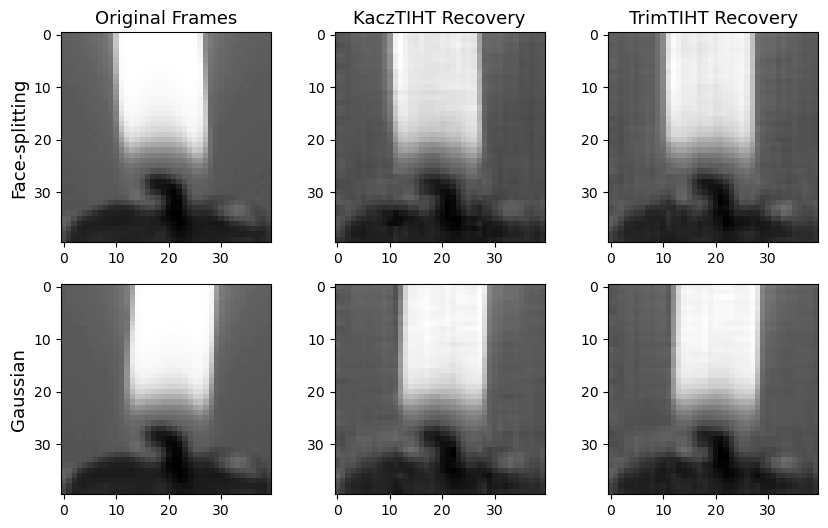

In [12]:
fig, axs = plt.subplots(2, 3)

fig.set_figheight(6)
fig.set_figwidth(10)

axs[0, 0].imshow(data_tensor[:,:,0], cmap='gray')
axs[0, 0].set_title('Original Frames',fontsize = 13)
axs[0,0].set_ylabel("Face-splitting",fontsize = 13)
axs[1, 0].imshow(data_tensor[:,:,9], cmap='gray')

axs[0, 1].imshow(KZIHT_rec[:,:,0], cmap='gray')
axs[0, 1].set_title('KaczTIHT Recovery',fontsize = 13)

axs[0, 2].imshow(ATIHT_rec[:,:,0], cmap='gray')
axs[0, 2].set_title('TrimTIHT Recovery',fontsize = 13)

axs[1, 1].imshow(KZIHT_rec_1[:,:,9], cmap='gray')
axs[1,0].set_ylabel("Gaussian",fontsize = 13)
axs[1, 2].imshow(ATIHT_rec_1[:,:,9], cmap='gray')
plt.savefig('Recovery_Candle_Img.png')

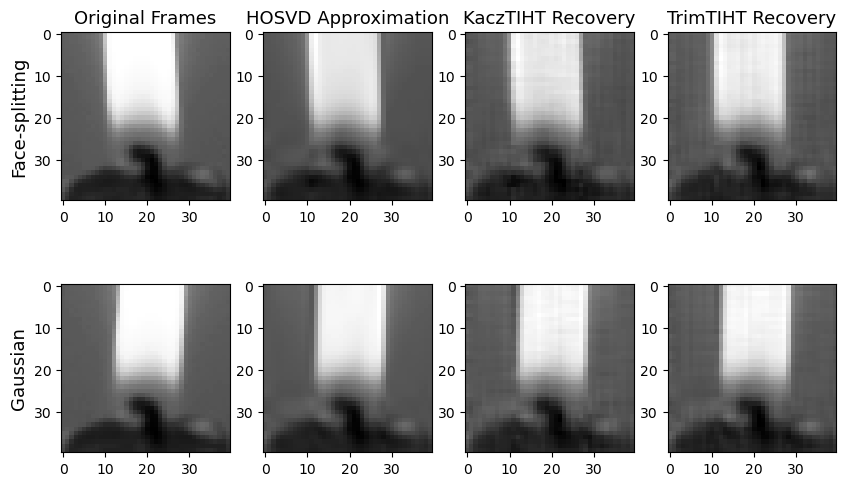

In [18]:
fig, axs = plt.subplots(2, 4)

fig.set_figheight(6)
fig.set_figwidth(10)

axs[0, 0].imshow(data_tensor[:,:,0], cmap='gray')
axs[0, 0].set_title('Original Frames',fontsize = 13)
axs[0,0].set_ylabel("Face-splitting",fontsize = 13)
axs[1, 0].imshow(data_tensor[:,:,9], cmap='gray')

axs[0, 2].imshow(KZIHT_rec[:,:,0], cmap='gray')
axs[0, 2].set_title('KaczTIHT Recovery',fontsize = 13)

axs[0, 3].imshow(ATIHT_rec[:,:,0], cmap='gray')
axs[0, 3].set_title('TrimTIHT Recovery',fontsize = 13)

axs[0,1].imshow(approx[:,:,0], cmap='gray')
axs[0, 1].set_title('HOSVD Approximation',fontsize = 13)
axs[1,1].imshow(approx[:,:,9], cmap='gray')

axs[1, 2].imshow(KZIHT_rec_1[:,:,9], cmap='gray')

axs[1,0].set_ylabel("Gaussian",fontsize = 13)
axs[1, 3].imshow(ATIHT_rec_1[:,:,9], cmap='gray')

plt.savefig('Recovery_Candle_Img_2.png')